## Feature Engineering
In the Titanic Data Science project, in the stage i will be performing Feature engineering - getting the dataset ready for machine learning.

The information gathered from the Data Analysis stage will be use to:
1. Fill the missing data
2. Encode the categorical column
3. Normalize/Standardize the data

### Import Libraries and Load the Data

In [1]:
# Import the libraries
import numpy as np #handle numerical calculations
import pandas as pd #handle the dataset
import matplotlib.pyplot as plt
import seaborn as sns #for some statistical visuals

**Load the Data**

In [2]:
dataset = pd.read_csv(r"C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\data\Titanic-Dataset.csv")
df = dataset.copy() #make a copy so i can still retain the original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Filling the missing data**

In [4]:
missing_columns = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
print(missing_columns)

df[missing_columns].isnull().mean()

['Age', 'Cabin', 'Embarked']


Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

**Columns with missing values:**
- Age (~20%) → Will be imputed using the median Age grouped by Pclass and Sex, since these features correlate with age.
- Cabin (~77%) → Too many missing values. Will be transformed into a new feature called Cabin Status (“Known” vs. “Unknown”).
- Embarked (~3%) → Few missing values. Will be filled using the mode (most common embarkation port).

In [5]:
# Age Stats
print(f"skewness: {df['Age'].skew().round(3)}")
print(f"kurtosis: {df['Age'].kurt().round(3)}")
df['Age'].describe().round(3)

skewness: 0.389
kurtosis: 0.178


count    714.000
mean      29.699
std       14.526
min        0.420
25%       20.125
50%       28.000
75%       38.000
max       80.000
Name: Age, dtype: float64

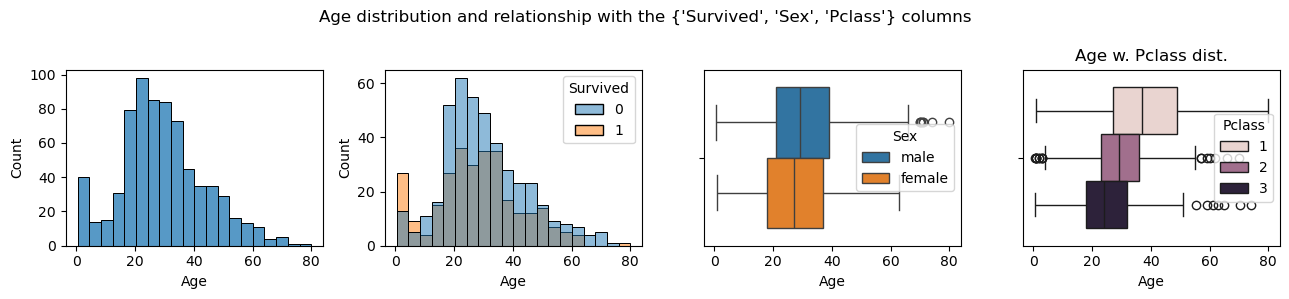

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(13, 3))

sns.histplot(x='Age', data=df, ax=ax[0])
plt.title('Age dist.')

sns.histplot(x='Age', data=df, hue='Survived', ax=ax[1])
plt.title('Age w. Survived dist.')

sns.boxplot(x='Age', data=df, hue='Sex', ax=ax[2])
plt.title('Age w. Sex dist.')

sns.boxplot(x='Age', data=df, hue='Pclass', ax=ax[3])
plt.title('Age w. Pclass dist.')

plt.suptitle("Age distribution and relationship with the {'Survived', 'Sex', 'Pclass'} columns")
plt.tight_layout()
plt.show()

In [7]:
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [8]:
df['Age_nan'] = np.where(df['Age'].isnull(), 1, 0)
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
print(df['Age'].isnull().sum())

0


In [9]:
df[(df['Age_nan'] == 1) & (df['Pclass'] == 3)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_nan
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,21.5,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.5,0,0,330959,7.8792,NaN,Q,1
29,30,0,3,"Todoroff, Mr. Lalio",male,25.0,0,0,349216,7.8958,NaN,S,1


In [10]:
df['Cabin_status'] = np.where(df['Cabin'].isnull(), 'unknown', 'known')
df.drop(labels=['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,known
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,known
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,unknown


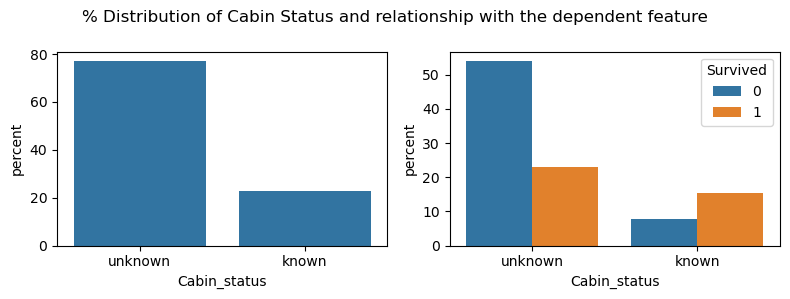

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(x='Cabin_status', data=df, ax=ax[0], stat='percent')
sns.countplot(x='Cabin_status', data=df, hue='Survived', ax=ax[1], stat='percent')

plt.suptitle("% Distribution of Cabin Status and relationship with the dependent feature")
plt.tight_layout()
plt.show()

There are more Known cabin than the unknown. Those who survived in the Known cabin are more than those who didn't survive.

In [12]:
df['Embarked_nan'] = np.where(df['Embarked'].isnull(), 1, 0)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df[df['Embarked_nan']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S,0,known,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S,0,known,1


In [13]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Age_nan         0
Cabin_status    0
Embarked_nan    0
dtype: int64

Every missing value have been dealt with, No more missing value in the dataset.

### **Categorical features**  
- Extract titles from Name column
- Create a new data 'family' for more descrpitive analysis
- From new data 'Family', Add the family_size and alone column
- Encode and drop some columns

In [14]:
df['Name'].head(25)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

Their titles are just Immediately after the first name (comma), which mean i can split them and get the titles

In [15]:
df['Name'][0].split(",")[1].split(".")[0].strip()

'Mr'

In [16]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df[['Title']].head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [17]:
print(f"Title has {df['Title'].nunique()} unique data which are {df['Title'].unique()}")

Title has 17 unique data which are ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [18]:
df[df['Title'] == 'Jonkheer']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan,Title
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,0,unknown,0,Jonkheer


In [19]:
def analyze_family(data, column):
    result = {
        'ticket': [], 
        'family_name': [],
        'pclass': [],
        'embarked': [],
        'cabin_status': [],
        'fare': [],
        'male_count': [],
        'female_count': [],
        'family_size': [],
        '#female_survived': [],
        '#male_survived': [],
        '#survived': [],
    }

    duplicates_tickets = data[data[column].duplicated(keep=False)] #find the duplicates tickets
    grouped = duplicates_tickets.groupby(column) #group by ticket

    for ticket, group in grouped:
        result['ticket'].append(ticket)

        surname = group.iloc[0]['Name'].split(',')[0].strip()
        result['family_name'].append(surname)

        result['pclass'].append(group['Pclass'].mode()[0])

        result['embarked'].append(group['Embarked'].mode()[0])

        result['cabin_status'].append(group['Cabin_status'].mode()[0])

        result['fare'].append(group['Fare'].mode()[0])

        result['family_size'].append(len(group))

        result['#survived'].append(group['Survived'].sum())

        result['male_count'].append(sum(group['Sex']=='male'))

        result['#male_survived'].append(sum((group['Sex']=='male') & (group['Survived']==1)))

        result['female_count'].append(sum(group['Sex']=='female'))

        result['#female_survived'].append(sum((group['Sex']=='female') & (group['Survived']==1)))

    return pd.DataFrame(result)

In [20]:
family_df = analyze_family(df, 'Ticket')
display(family_df.info())
family_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            134 non-null    object 
 1   family_name       134 non-null    object 
 2   pclass            134 non-null    int64  
 3   embarked          134 non-null    object 
 4   cabin_status      134 non-null    object 
 5   fare              134 non-null    float64
 6   male_count        134 non-null    int64  
 7   female_count      134 non-null    int64  
 8   family_size       134 non-null    int64  
 9   #female_survived  134 non-null    int64  
 10  #male_survived    134 non-null    int64  
 11  #survived         134 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 12.7+ KB


None

,ticket,family_name,pclass,embarked,cabin_status,fare,male_count,female_count,family_size,#female_survived,#male_survived,#survived
0,110152,Cherry,1,S,known,86.5000,0,3,3,3,0,3
1,110413,Taussig,1,S,known,79.6500,1,2,3,2,0,2
2,110465,Porter,1,S,known,52.0000,2,0,2,0,0,0
3,111361,Hippach,1,C,known,57.9792,0,2,2,2,0,2
4,113505,Chibnall,1,S,known,55.0000,0,2,2,2,0,2


In [21]:
family_df.nunique()

ticket              134
family_name         133
pclass                3
embarked              3
cabin_status          2
fare                106
male_count            7
female_count          6
family_size           6
#female_survived      5
#male_survived        4
#survived             6
dtype: int64

In [22]:
df[df['Ticket'] == '110465']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan,Title
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0,S,0,known,0,Mr
475,476,0,1,"Clifford, Mr. George Quincy",male,40.0,0,0,110465,52.0,S,1,known,0,Mr


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,unknown,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,known,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,unknown,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,known,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,unknown,0,Mr


In [24]:
df = df.merge(family_df[['ticket', 'family_size']], left_on='Ticket', right_on='ticket', how='left').drop(columns='ticket')
df['family_size'] = df['family_size'].fillna(1).astype('int64')
df['alone'] = np.where(df['family_size'] == 1, 'Yes', 'No')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan,Title,family_size,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,unknown,0,Mr,1,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,known,0,Mrs,1,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,unknown,0,Miss,1,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,known,0,Mrs,2,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,unknown,0,Mr,1,Yes


Before encoding and dropping some categorical data i will save the clean dataset.

In [25]:
df.to_csv(r"C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\data\Titanic_clean_dataset.csv", index=False)
family_df.to_csv(r"C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\data\Family_clean_dataset.csv", index=False)

I also want to save as excel doc 

In [26]:
with pd.ExcelWriter(r'C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\data\Titanic.xlsx') as writer:
    df.to_excel(writer, sheet_name='data', index=False)
    family_df.to_excel(writer, sheet_name='family', index=False)

### **Encoding**
- Sex (male: 0, female: 1)
- Embarked (one hot encoding. get_dummies)
- cabin_status (unknown: 0, known:1)
- alone (Yes: 1, No: 0)
- Title (set rare title to others, and use one hot encoding)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan,Title,family_size,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,unknown,0,Mr,1,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,known,0,Mrs,1,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,unknown,0,Miss,1,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,known,0,Mrs,2,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,unknown,0,Mr,1,Yes


In [28]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Cabin_status'] = df['Cabin_status'].map({'unknown':0, 'known':1})
df['alone'] = df['alone'].map({'No': 0, 'Yes': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan,Title,family_size,alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,0,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0,1,0,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,1,0,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,0,Mr,1,1


In [29]:
embarked_coded = pd.get_dummies(df['Embarked'], prefix='Embarked', dtype=float)
df = pd.concat([df, embarked_coded], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_nan,Cabin_status,Embarked_nan,Title,family_size,alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,0,Mr,1,1,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0,1,0,Mrs,1,1,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,Miss,1,1,0.0,0.0,1.0


In [30]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

from the value_counts those title whose count are less than 10 will be the rare title and will be replace with others.

In [31]:
rare = [title for title, count in df['Title'].value_counts().items() if count < 10]
print(f"Rare title: {rare} \n")

df['Title'] = df['Title'].replace(rare, 'Others')
print(f"{df['Title'].nunique()} Unique value are in title, they are: {df['Title'].unique()} \n")

title_coded = pd.get_dummies(df['Title'], prefix='Title', dtype=float)
df = pd.concat([df, title_coded], axis=1)
df.head(3)

Rare title: ['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Ms', 'Mme', 'Don', 'Lady', 'Sir', 'Capt', 'the Countess', 'Jonkheer'] 

5 Unique value are in title, they are: ['Mr' 'Mrs' 'Miss' 'Master' 'Others'] 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,family_size,alone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


After encoding the categorical columns to proceed i will drop the following columns:  
['PassengerId', 'Name', 'Ticket', 'Embarked', 'Title']

In [32]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked', 'Title'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_nan,Cabin_status,Embarked_nan,family_size,alone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,0,22.0,1,0,7.2500,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1,38.0,1,0,71.2833,0,1,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,1,1,35.0,1,0,53.1000,0,1,0,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,0,35.0,0,0,8.0500,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


To proceed, I will scale the Age and Fare columns. For their distribution; the Age is close to a normal distribution i will go ahead and standardize the Age column but the Fare is heavily skewed so i will apply the log function to bring it close to a symmetric distribution after that i will standardize

### **Scaling**
Scaling the Age and Fare column

In [33]:
df['Fare_log'] = np.log1p(df['Fare'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_nan,Cabin_status,Embarked_nan,...,alone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Fare_log
0,0,3,0,22.0,1,0,7.2500,0,0,0,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.110213
1,1,1,1,38.0,1,0,71.2833,0,1,0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.280593
2,1,3,1,26.0,0,0,7.9250,0,0,0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.188856
3,1,1,1,35.0,1,0,53.1000,0,1,0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.990834
4,0,3,0,35.0,0,0,8.0500,0,0,0,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.202765


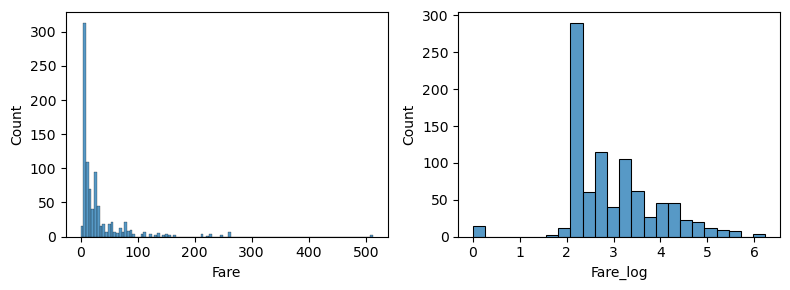

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(x=df['Fare'], ax=ax[0])
sns.histplot(x=df['Fare_log'], ax=ax[1])

plt.tight_layout()
plt.show()

In [35]:
# finally we'll standardize
from sklearn.preprocessing import StandardScaler #import the standardscaler from sklearn

scaler = StandardScaler()

In [36]:
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_log_scaled'] = scaler.fit_transform(df[['Fare_log']])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_nan,Cabin_status,Embarked_nan,...,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Fare_log,Age_scaled,Fare_log_scaled
0,0,3,0,22.0,1,0,7.2500,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.110213,-0.534891,-0.879741
1,1,1,1,38.0,1,0,71.2833,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.280593,0.668392,1.361220
2,1,3,1,26.0,0,0,7.9250,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.188856,-0.234070,-0.798540
3,1,1,1,35.0,1,0,53.1000,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.990834,0.442776,1.062038
4,0,3,0,35.0,0,0,8.0500,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.202765,0.442776,-0.784179


For the dataset to be fully ready for modelling, I'll drop the ['Fare', 'Fare_log'] columns. For modeling experiments I will keep both Age and Age_scaled initially (so I can compare).

In [37]:
df.drop(columns=['Fare', 'Fare_log'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Age_nan,Cabin_status,Embarked_nan,family_size,...,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Age_scaled,Fare_log_scaled
0,0,3,0,22.0,1,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.534891,-0.879741
1,1,1,1,38.0,1,0,0,1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.668392,1.361220
2,1,3,1,26.0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.234070,-0.798540
3,1,1,1,35.0,1,0,0,1,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.442776,1.062038
4,0,3,0,35.0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.442776,-0.784179


### Conclusion

This dataset is fully ready for modelling.

However, everything done here is just for the learning. The best practice for feature engineering is to split our data into train and test data, before Imputing missing values, encoding and scaling. Reasons is because we need to avoid data leakage. The model shouldn't use any information from the test data at all. So during the preprocessing when we fit transform on the train data, we only transform the test data. Also we only perform the median imputation on the train data use it to fill the test data, instead of using both the train and test data to fill the missing values.

So to correct this a new Data Preprocessing will be done from scratch using a new notebook, it will be tagged as 'Feature Engineering on Titanic 2'

In [38]:
df.to_csv(r"C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\data\processed_titanic.csv", index=False)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Age_nan          891 non-null    int64  
 7   Cabin_status     891 non-null    int64  
 8   Embarked_nan     891 non-null    int64  
 9   family_size      891 non-null    int64  
 10  alone            891 non-null    int64  
 11  Embarked_C       891 non-null    float64
 12  Embarked_Q       891 non-null    float64
 13  Embarked_S       891 non-null    float64
 14  Title_Master     891 non-null    float64
 15  Title_Miss       891 non-null    float64
 16  Title_Mr         891 non-null    float64
 17  Title_Mrs       